In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from pprint import pprint
from varname import nameof
import matplotlib.pyplot as plt
import src.utils.index as utils
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from imblearn.combine import SMOTEENN, SMOTETomek
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report
from sklearn.preprocessing import FunctionTransformer, MinMaxScaler, Normalizer, StandardScaler

In [2]:
# CONSTANTS DECLARATION
MODELS = {
    "Logistic Regression": LogisticRegression,
    "K Nearest Neighbors": KNeighborsClassifier,
    "Decision Tree Classifier": DecisionTreeClassifier,
    "Random Forest Classifier": RandomForestClassifier
}

SCALERS = {
    "Standard Scaler": StandardScaler,
    "MinMax Scaler": MinMaxScaler,
    "Normalizer": Normalizer,
    "Function Transformer": FunctionTransformer
}

BALANCERS ={
    "SMOTE": SMOTE,
    "TomekLinks": TomekLinks,
    "SMOTEENN": SMOTEENN,
    "SMOTETomek": SMOTETomek
}

In [3]:
df = pd.read_csv("./src/data/diabetes_binary_health_indicators_BRFSS2015.csv")

In [4]:
display(f"Shape of the dataset (m=rows x n=columns): {df.shape}")
display("Data frame preview, first 20 rows: ")
df.head(20).T

'Shape of the dataset (m=rows x n=columns): (253680, 22)'

'Data frame preview, first 20 rows: '

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Diabetes_binary,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
HighBP,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
HighChol,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
CholCheck,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
BMI,40.0,25.0,28.0,27.0,24.0,25.0,30.0,25.0,30.0,24.0,25.0,34.0,26.0,28.0,33.0,33.0,21.0,23.0,23.0,28.0
Smoker,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
Stroke,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
HeartDiseaseorAttack,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
PhysActivity,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0
Fruits,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [5]:
columns = df.columns
columns_lst = columns.tolist() 
pprint(columns_lst)

['Diabetes_binary',
 'HighBP',
 'HighChol',
 'CholCheck',
 'BMI',
 'Smoker',
 'Stroke',
 'HeartDiseaseorAttack',
 'PhysActivity',
 'Fruits',
 'Veggies',
 'HvyAlcoholConsump',
 'AnyHealthcare',
 'NoDocbcCost',
 'GenHlth',
 'MentHlth',
 'PhysHlth',
 'DiffWalk',
 'Sex',
 'Age',
 'Education',
 'Income']


In [6]:
for col in df.columns:
    if len(df[col].unique()) == 2:
        df[col] = df[col].astype(int)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  int32  
 1   HighBP                253680 non-null  int32  
 2   HighChol              253680 non-null  int32  
 3   CholCheck             253680 non-null  int32  
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  int32  
 6   Stroke                253680 non-null  int32  
 7   HeartDiseaseorAttack  253680 non-null  int32  
 8   PhysActivity          253680 non-null  int32  
 9   Fruits                253680 non-null  int32  
 10  Veggies               253680 non-null  int32  
 11  HvyAlcoholConsump     253680 non-null  int32  
 12  AnyHealthcare         253680 non-null  int32  
 13  NoDocbcCost           253680 non-null  int32  
 14  GenHlth               253680 non-null  float64
 15  

In [7]:
utils.unique_values_per_column(df)

,unique value count
Diabetes_binary,2
HighBP,2
HighChol,2
CholCheck,2
BMI,84
Smoker,2
Stroke,2
HeartDiseaseorAttack,2
PhysActivity,2
Fruits,2


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Diabetes_binary,253680.0,0.139333,0.346294,0.0,0.0,0.0,0.0,1.0
HighBP,253680.0,0.429001,0.494934,0.0,0.0,0.0,1.0,1.0
HighChol,253680.0,0.424121,0.494210,0.0,0.0,0.0,1.0,1.0
CholCheck,253680.0,0.962670,0.189571,0.0,1.0,1.0,1.0,1.0
BMI,253680.0,28.382364,6.608694,12.0,24.0,27.0,31.0,98.0
Smoker,253680.0,0.443169,0.496761,0.0,0.0,0.0,1.0,1.0
Stroke,253680.0,0.040571,0.197294,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,253680.0,0.094186,0.292087,0.0,0.0,0.0,0.0,1.0
PhysActivity,253680.0,0.756544,0.429169,0.0,1.0,1.0,1.0,1.0
Fruits,253680.0,0.634256,0.481639,0.0,0.0,1.0,1.0,1.0


In [9]:
duplicates_arr, duplicates_len = utils.duplicate_obs(df)
display(f"Number of duplicated rows: {duplicates_len}")

'Number of duplicated rows: 24206'

In [10]:
initial_obs = df.shape[0]
df.drop_duplicates(inplace=True)
final_obs = df.shape[0]
if initial_obs - final_obs == duplicates_len:
    print(f"Correctly removed duplicated obs totaling {duplicates_len}")

Correctly removed duplicated obs totaling 24206


In [11]:
df.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

array([[<AxesSubplot: title={'center': 'Diabetes_binary'}>,
        <AxesSubplot: title={'center': 'HighBP'}>,
        <AxesSubplot: title={'center': 'HighChol'}>,
        <AxesSubplot: title={'center': 'CholCheck'}>,
        <AxesSubplot: title={'center': 'BMI'}>],
       [<AxesSubplot: title={'center': 'Smoker'}>,
        <AxesSubplot: title={'center': 'Stroke'}>,
        <AxesSubplot: title={'center': 'HeartDiseaseorAttack'}>,
        <AxesSubplot: title={'center': 'PhysActivity'}>,
        <AxesSubplot: title={'center': 'Fruits'}>],
       [<AxesSubplot: title={'center': 'Veggies'}>,
        <AxesSubplot: title={'center': 'HvyAlcoholConsump'}>,
        <AxesSubplot: title={'center': 'AnyHealthcare'}>,
        <AxesSubplot: title={'center': 'NoDocbcCost'}>,
        <AxesSubplot: title={'center': 'GenHlth'}>],
       [<AxesSubplot: title={'center': 'MentHlth'}>,
        <AxesSubplot: title={'center': 'PhysHlth'}>,
        <AxesSubplot: title={'center': 'DiffWalk'}>,
        <AxesSubp

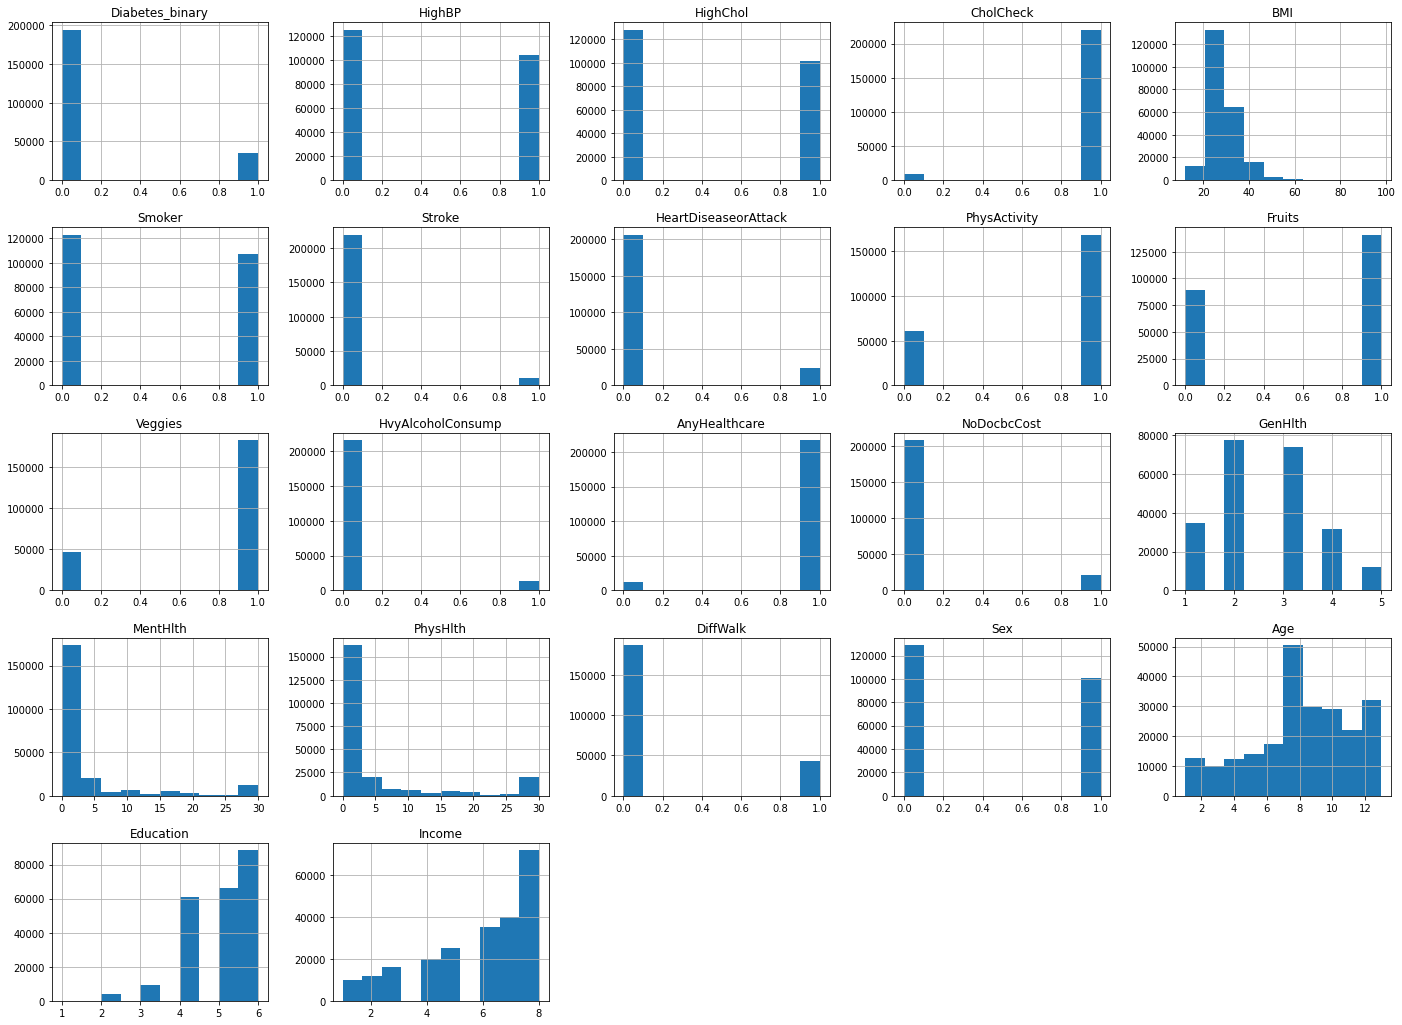

In [12]:
df.hist(figsize=(24,18))

<AxesSubplot: >

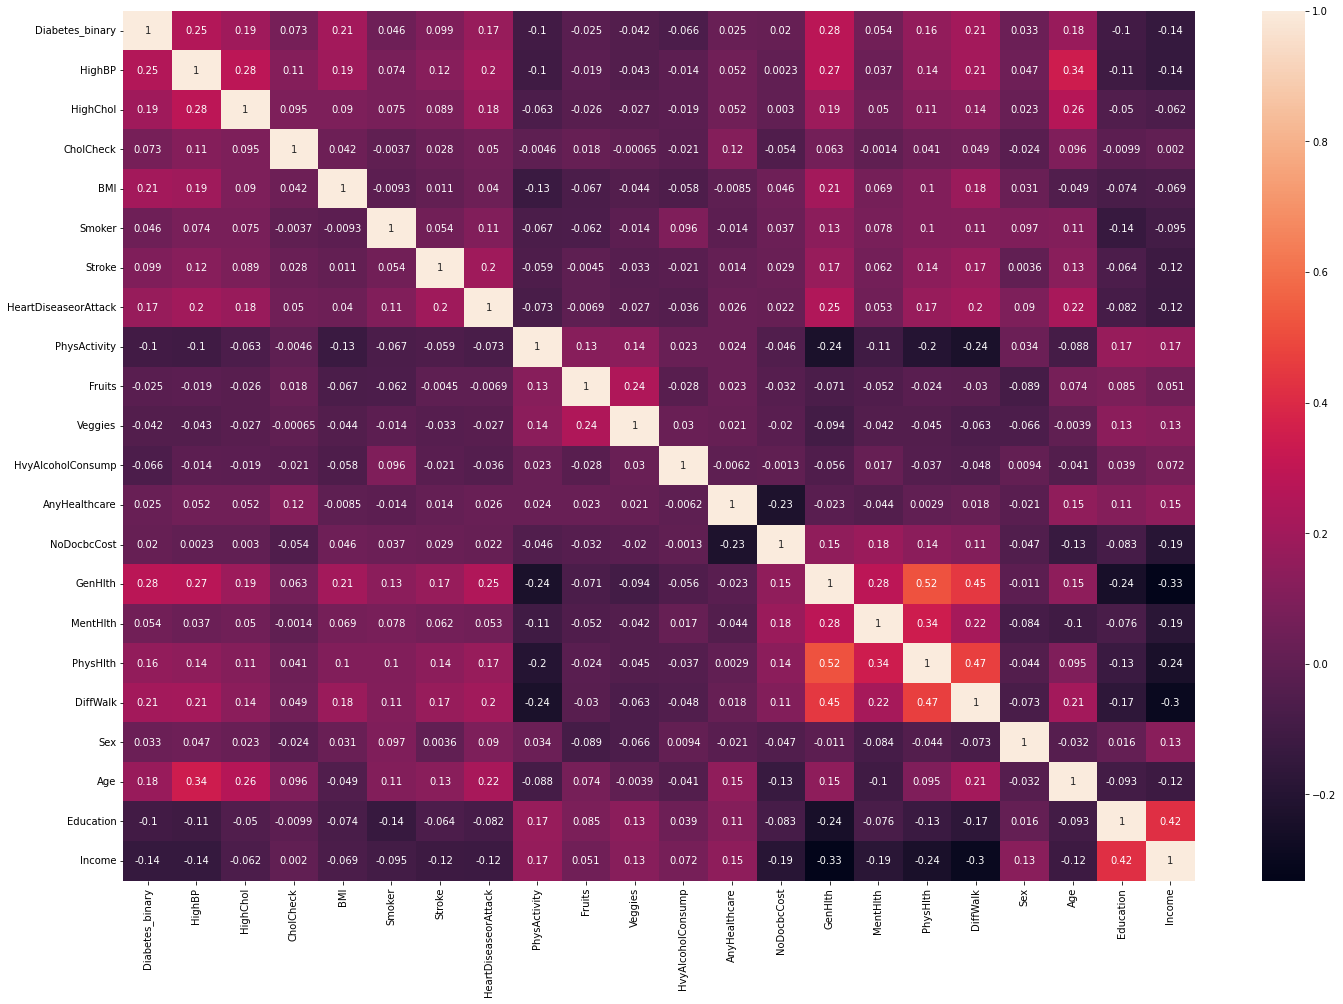

In [13]:
plt.figure(figsize=(24,16))
sns.heatmap(df.corr(), annot=True)

In [14]:
multicol_df = utils.report_multicoll(df)
multicol_df

,feat1,feat2,corr
0,Age,HighBP,0.339802
1,DiffWalk,GenHlth,0.446696
2,DiffWalk,PhysHlth,0.466852
3,Education,Income,0.419045
4,GenHlth,Income,-0.331782
5,GenHlth,PhysHlth,0.516476
6,MentHlth,PhysHlth,0.340191


In [15]:
col_to_drop = ["DiffWalk", "GenHlth"]
df = df.drop(["DiffWalk", "GenHlth"], axis=1)
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,MentHlth,PhysHlth,Sex,Age,Education,Income
0,0,1,1,1,40.0,1,0,0,0,0,1,0,1,0,18.0,15.0,0,9.0,4.0,3.0
1,0,0,0,0,25.0,1,0,0,1,0,0,0,0,1,0.0,0.0,0,7.0,6.0,1.0
2,0,1,1,1,28.0,0,0,0,0,1,0,0,1,1,30.0,30.0,0,9.0,4.0,8.0
3,0,1,0,1,27.0,0,0,0,1,1,1,0,1,0,0.0,0.0,0,11.0,3.0,6.0
4,0,1,1,1,24.0,0,0,0,1,1,1,0,1,0,3.0,0.0,0,11.0,5.0,4.0


## SPLIT

In [16]:
X_train, X_test, y_train, y_test = utils.split_data(df, target="Diabetes_binary")


## BENCHMARK

In [17]:
benchmark_prediction_of_models = utils.get_predictions(MODELS, sets=[X_train, X_test, y_train, y_test])
benchmark_results = utils.get_results(benchmark_prediction_of_models, y_test)
benchmark_results

C:\Users\diego\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,r2,mean_abs,mean_sqrd
model,,,
Logistic Regression,-0.162767,0.150621,0.388100
K Nearest Neighbors,-0.317246,0.170632,0.413077
Decision Tree Classifier,-0.764806,0.228608,0.478129
Random Forest Classifier,-0.248349,0.161708,0.402129


In [18]:
for prediction in benchmark_prediction_of_models:
    print(prediction[0])
    print(classification_report(y_test, prediction[1]))
    print(confusion_matrix(y_test, prediction[1]))

Logistic Regression
              precision    recall  f1-score   support

           0       0.86      0.98      0.92     48596
           1       0.53      0.12      0.20      8773

    accuracy                           0.85     57369
   macro avg       0.70      0.55      0.56     57369
weighted avg       0.81      0.85      0.81     57369

[[47656   940]
 [ 7701  1072]]
K Nearest Neighbors
              precision    recall  f1-score   support

           0       0.86      0.95      0.90     48596
           1       0.38      0.18      0.24      8773

    accuracy                           0.83     57369
   macro avg       0.62      0.56      0.57     57369
weighted avg       0.79      0.83      0.80     57369

[[46043  2553]
 [ 7236  1537]]
Decision Tree Classifier
              precision    recall  f1-score   support

           0       0.87      0.86      0.86     48596
           1       0.27      0.30      0.29      8773

    accuracy                           0.77     57369
 

## SCALING

In [19]:
# because we have only integer (discrete and float), lets scale all float values
results_df = pd.DataFrame(columns=["scaler", "balancer", "model", "FP", "FN", "accuracy"])
for scaler_name, scaler in SCALERS.items():
    X_train_scaled, X_test_scaled = utils.scale_sets([X_train, X_test], scaler=scaler)
    for balancer_name, balancer in BALANCERS.items():
        X_train_scaled_balanced, y_train_balanced = balancer().fit_resample(X=X_train_scaled, y=y_train)
        prediction_of_models = utils.get_predictions(MODELS, sets=[
                                                                X_train_scaled_balanced, 
                                                                X_test_scaled,
                                                                y_train_balanced, 
                                                                y_test])
        for prediction in prediction_of_models:
            cm_results = confusion_matrix(y_test, prediction[1])
            classification_report_dict = classification_report(y_test, prediction[1], output_dict=True)
            result = pd.Series({
                "scaler": scaler_name,
                "balancer": balancer_name,
                "model": prediction[0],
                "FP": cm_results[0][1],
                "FN": cm_results[1][0],
                "accuracy": classification_report_dict["accuracy"]
            })
            results_df = pd.concat([results_df, result.to_frame().T], axis=0, ignore_index=True)

results_df


# X_train_scaled, X_test_scaled = utils.scale_sets([X_train, X_test], scaler=MinMaxScaler)

,scaler,balancer,model,FP,FN,accuracy
0,Standard Scaler,SMOTE,Logistic Regression,14888,2190,0.702313
1,Standard Scaler,SMOTE,K Nearest Neighbors,14037,3715,0.690565
2,Standard Scaler,SMOTE,Decision Tree Classifier,43455,332,0.236748
3,Standard Scaler,SMOTE,Random Forest Classifier,42045,382,0.260454
4,Standard Scaler,TomekLinks,Logistic Regression,1370,7313,0.848646
...,...,...,...,...,...,...
59,Function Transformer,SMOTEENN,Random Forest Classifier,12734,2865,0.728094
60,Function Transformer,SMOTETomek,Logistic Regression,15327,2086,0.696474
61,Function Transformer,SMOTETomek,K Nearest Neighbors,13918,3820,0.690809
62,Function Transformer,SMOTETomek,Decision Tree Classifier,9689,5162,0.741132


In [41]:
# remove low accuracy
results_df = results_df[results_df["accuracy"] >= .60]
display(results_df)

,scaler,balancer,model,FP,FN,accuracy
0,Standard Scaler,SMOTE,Logistic Regression,14888,2190,0.702313
1,Standard Scaler,SMOTE,K Nearest Neighbors,14037,3715,0.690565
4,Standard Scaler,TomekLinks,Logistic Regression,1370,7313,0.848646
5,Standard Scaler,TomekLinks,K Nearest Neighbors,3475,6613,0.824156
6,Standard Scaler,TomekLinks,Decision Tree Classifier,7344,5881,0.769475
7,Standard Scaler,TomekLinks,Random Forest Classifier,2730,6764,0.83451
8,Standard Scaler,SMOTEENN,Logistic Regression,18812,1506,0.645837
9,Standard Scaler,SMOTEENN,K Nearest Neighbors,18079,2431,0.64249
12,Standard Scaler,SMOTETomek,Logistic Regression,14842,2199,0.702958
13,Standard Scaler,SMOTETomek,K Nearest Neighbors,14092,3748,0.689031


In [44]:
results_df = results_df.sort_values(by=["FP", "FN", "accuracy"], ascending=False)
display(results_df)


,scaler,balancer,model,FP,FN,accuracy
8,Standard Scaler,SMOTEENN,Logistic Regression,18812,1506,0.645837
40,Normalizer,SMOTEENN,Logistic Regression,18554,1525,0.650003
56,Function Transformer,SMOTEENN,Logistic Regression,18541,1523,0.650264
24,MinMax Scaler,SMOTEENN,Logistic Regression,18137,1604,0.655894
9,Standard Scaler,SMOTEENN,K Nearest Neighbors,18079,2431,0.64249
57,Function Transformer,SMOTEENN,K Nearest Neighbors,17492,2621,0.64941
25,MinMax Scaler,SMOTEENN,K Nearest Neighbors,17373,2677,0.650508
41,Normalizer,SMOTEENN,K Nearest Neighbors,17358,2680,0.650717
48,Function Transformer,SMOTE,Logistic Regression,15335,2089,0.696282
60,Function Transformer,SMOTETomek,Logistic Regression,15327,2086,0.696474


<AxesSubplot: xlabel='FN', ylabel='accuracy'>

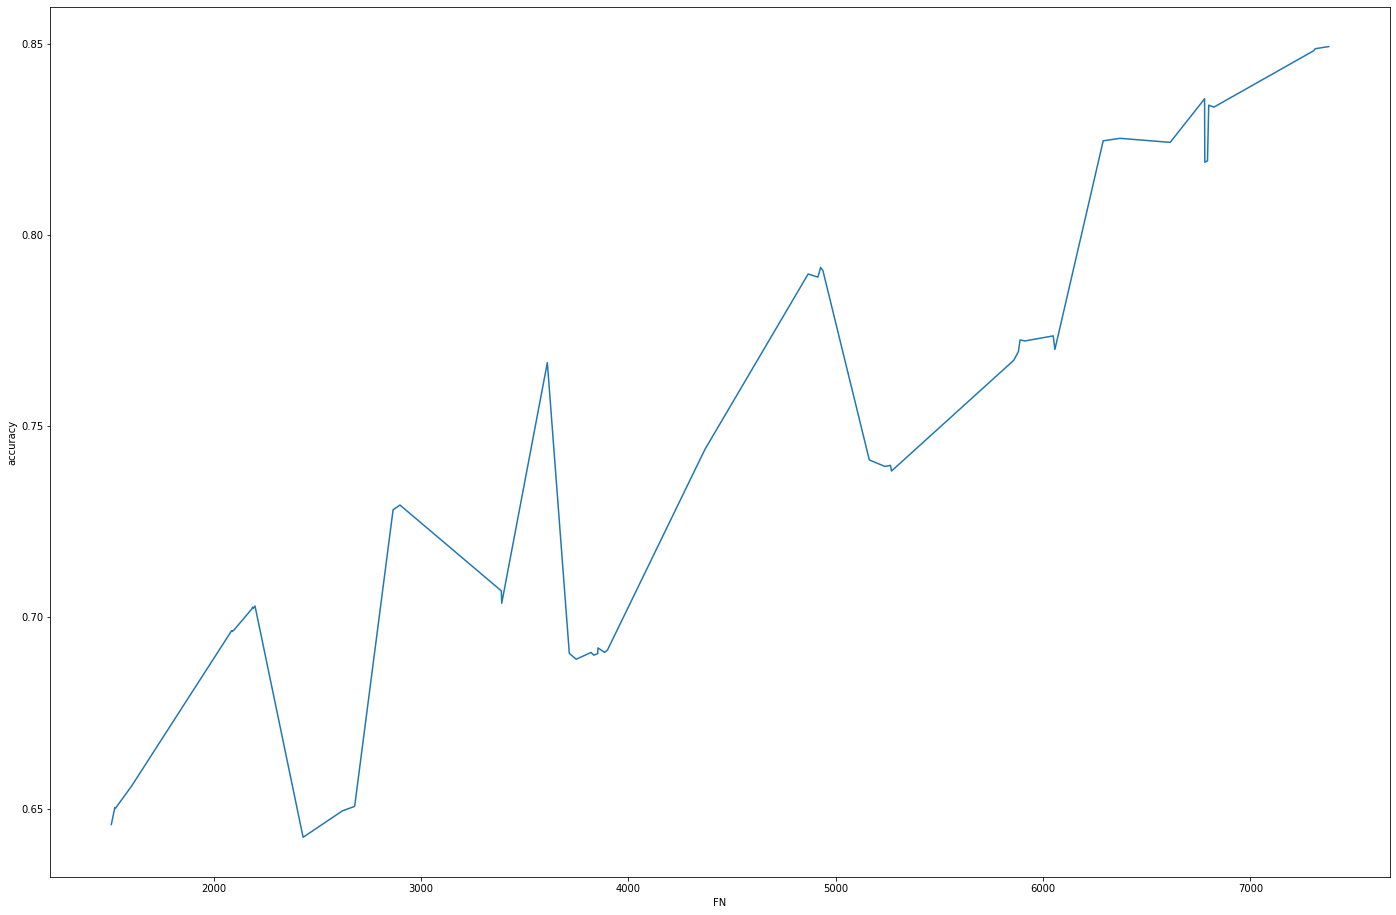

In [47]:
plt.figure(figsize=(24,16))
sns.lineplot(data=results_df, x="FN", y="accuracy")